# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

# Data treatment

In [3]:
df['arrete'] = pd.to_datetime(df['arrete'])
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])
df_validation = df[df['arrete']>"2020-12-30"]
data = df[df['arrete']<"2020-12-30"]
data_logit = data.drop_duplicates(subset = 'cd_op', keep = 'last')

# Colonnes à retirer car trop de NaN

In [5]:
liste_col_a_retirer = ['ANC_BANC_MAX_PFI','MT_CHA_CSM_REV','MT_CHA_IMP','MT_CHA_PIP','MT_CHA_PIV','NB_RP_HOP','NB_RS_HOP','NB_LO_HOP',
                        'dtSRT1st','valeur_bien_afr','mt_inscrip_devant_CL_afr','dispo_HP_afr','MT_CHG_MSL','mt_rev_dispo','LTV_actu','LTVnonactu_1an_avant_def','AMI','EXE','PTG','AGE_EMP2','CD_MTF_ENE_CTX','niv_gravite_mtf_dne','niv_gravite_mtf_dfs','MT_CHG_MSL','mt_rev_dispo','TX_ENDET','MT_REST_VIVRE','fam_PCD','mt_dec_cum_IMP_tot',
                       'date_sortie_defaut', 'CD_NAT_EMP2', 'MT_CHA_CSM_REV', 'MT_CHA_IMP','MT_CHA_PIP', 'MT_CHA_PIV', 'CD_CSP_EMP2', 'CD_SITFAM_EMP2','NB_RP_HOP', 'NB_RS_HOP', 'NB_LO_HOP', 'dtSRT1st', 'dtHJD_def','dtHJD_prov', 'dt_arr_last_enc_ope', 'dt_arr_1st_enc_ope','valeur_bien_afr', 'mt_inscrip_devant_CL_afr', 'dispo_HP_afr','LTV_actu', 'LTVnonactu_1an_avant_def', 'AMI', 'EXE', 'PTG','AGE_EMP2','cum_dec','cum_rec']
# cum_dec enorme pouvoir predictif, demander si il faut la retirer ou non
liste_col_a_retirer = set(liste_col_a_retirer) # pour supprimer les doublons
liste_col_a_retirer = list(liste_col_a_retirer)

# Logit sans retirer les doublons

In [6]:
X = data.drop(columns=liste_col_a_retirer) # On drop les var qui ont trop de NaN
X = X.select_dtypes(include = 'number')
X.dropna(inplace = True)

y = X['fl_pass_DET']

X.drop(columns = 'fl_pass_DET', inplace = True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

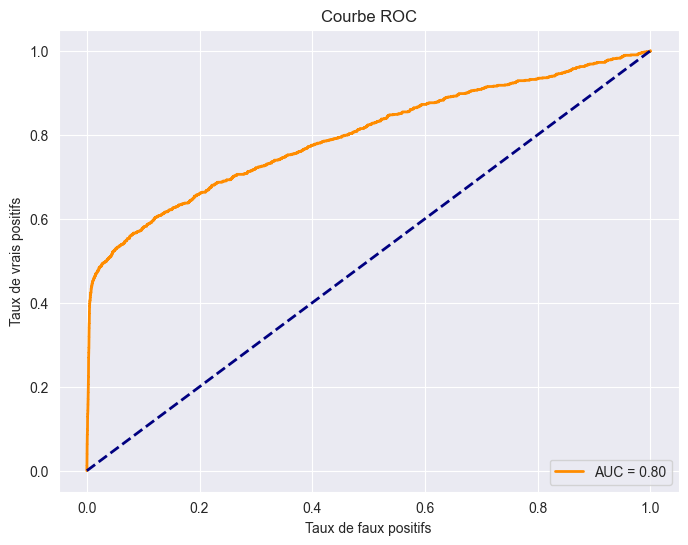

In [8]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

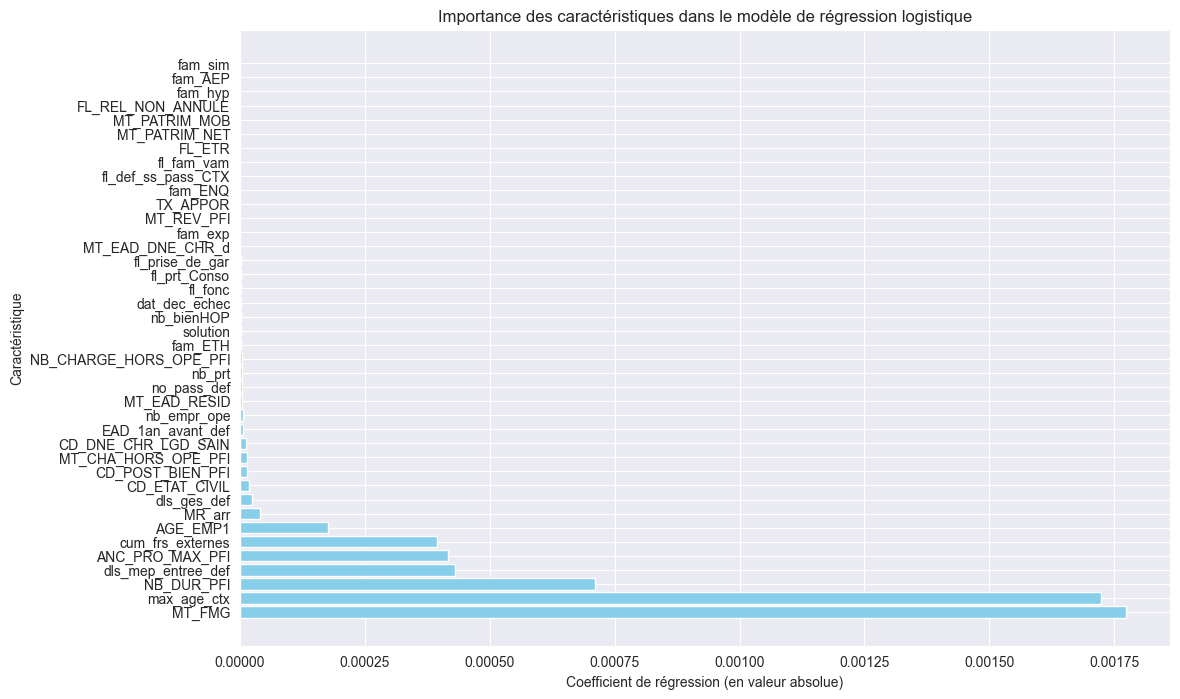

In [9]:
coefficients = model.coef_[0]

feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient de régression (en valeur absolue)')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.show()

In [10]:
feature_importance_df['Feature'].to_list()

['MT_FMG',
 'max_age_ctx',
 'NB_DUR_PFI',
 'dls_mep_entree_def',
 'ANC_PRO_MAX_PFI',
 'cum_frs_externes',
 'AGE_EMP1',
 'MR_arr',
 'dls_ges_def',
 'CD_ETAT_CIVIL',
 'CD_POST_BIEN_PFI',
 'MT_CHA_HORS_OPE_PFI',
 'CD_DNE_CHR_LGD_SAIN',
 'EAD_1an_avant_def',
 'nb_empr_ope',
 'MT_EAD_RESID',
 'no_pass_def',
 'nb_prt',
 'NB_CHARGE_HORS_OPE_PFI',
 'fam_ETH',
 'solution',
 'nb_bienHOP',
 'dat_dec_echec',
 'fl_fonc',
 'fl_prt_Conso',
 'fl_prise_de_gar',
 'MT_EAD_DNE_CHR_d',
 'fam_exp',
 'MT_REV_PFI',
 'TX_APPOR',
 'fam_ENQ',
 'fl_def_ss_pass_CTX',
 'fl_fam_vam',
 'FL_ETR',
 'MT_PATRIM_NET',
 'MT_PATRIM_MOB',
 'FL_REL_NON_ANNULE',
 'fam_hyp',
 'fam_AEP',
 'fam_sim']

# Logit en supprimant les doublons

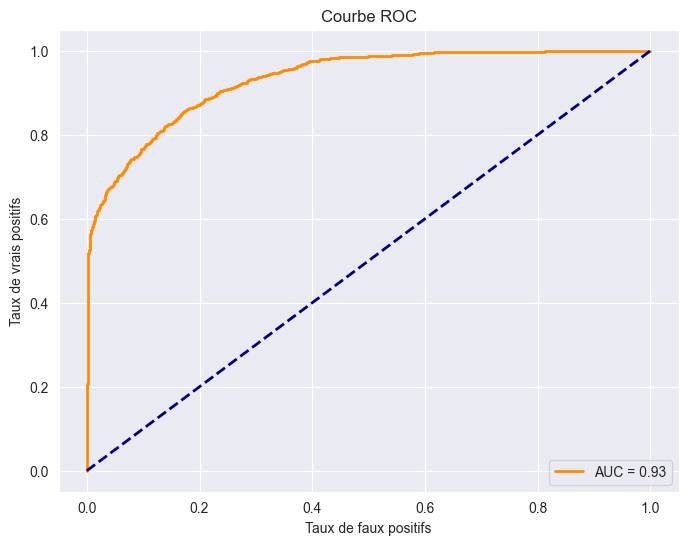

In [11]:
X = data_logit.drop(columns=liste_col_a_retirer) # On drop les var qui ont trop de NaN
X = X.select_dtypes(include = 'number')
X.dropna(inplace = True)

y = X['fl_pass_DET']

X.drop(columns = 'fl_pass_DET', inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model2 = LogisticRegression()

model2.fit(X_train, y_train)

y_prob = model2.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

y_pred = model2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Sans retirer variables suspectes

In [12]:
liste_col_a_retirer = ['ANC_BANC_MAX_PFI','MT_CHA_CSM_REV','MT_CHA_IMP','MT_CHA_PIP','MT_CHA_PIV','NB_RP_HOP','NB_RS_HOP','NB_LO_HOP',
                        'dtSRT1st','valeur_bien_afr','mt_inscrip_devant_CL_afr','dispo_HP_afr','MT_CHG_MSL','mt_rev_dispo','LTV_actu','LTVnonactu_1an_avant_def','AMI','EXE','PTG','AGE_EMP2','CD_MTF_ENE_CTX','niv_gravite_mtf_dne','niv_gravite_mtf_dfs','MT_CHG_MSL','mt_rev_dispo','TX_ENDET','MT_REST_VIVRE','fam_PCD','mt_dec_cum_IMP_tot',
                       'date_sortie_defaut', 'CD_NAT_EMP2', 'MT_CHA_CSM_REV', 'MT_CHA_IMP','MT_CHA_PIP', 'MT_CHA_PIV', 'CD_CSP_EMP2', 'CD_SITFAM_EMP2','NB_RP_HOP', 'NB_RS_HOP', 'NB_LO_HOP', 'dtSRT1st', 'dtHJD_def','dtHJD_prov', 'dt_arr_last_enc_ope', 'dt_arr_1st_enc_ope','valeur_bien_afr', 'mt_inscrip_devant_CL_afr', 'dispo_HP_afr','LTV_actu', 'LTVnonactu_1an_avant_def', 'AMI', 'EXE', 'PTG','AGE_EMP2']
# cum_dec enorme pouvoir predictif, demander si il faut la retirer ou non
liste_col_a_retirer = set(liste_col_a_retirer) # pour supprimer les doublons
liste_col_a_retirer = list(liste_col_a_retirer)

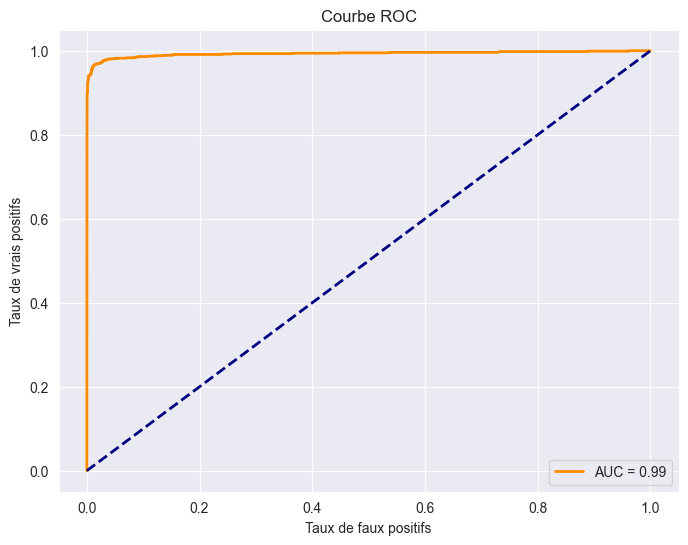

In [13]:
X = data.drop(columns=liste_col_a_retirer) # On drop les var qui ont trop de NaN
X = X.select_dtypes(include = 'number')
X.dropna(inplace = True)

y = X['fl_pass_DET']

X.drop(columns = 'fl_pass_DET', inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = LogisticRegression()

model3.fit(X_train, y_train)

y_prob = model3.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

y_pred = model3.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

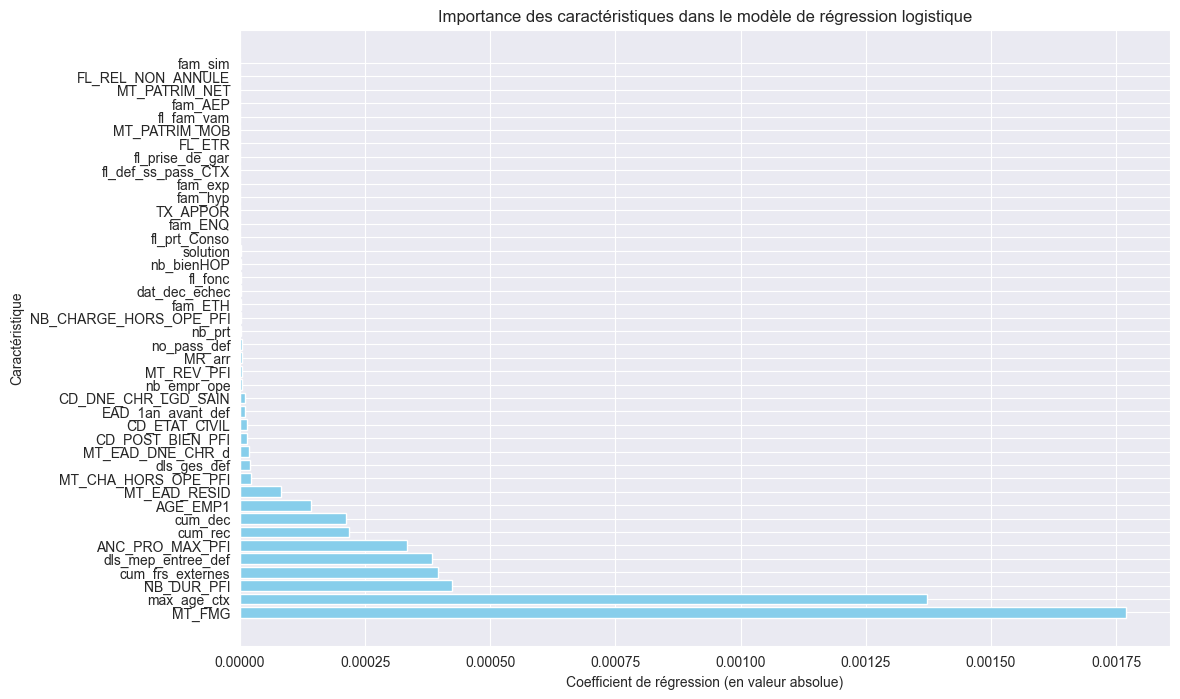

In [14]:
coefficients = model.coef_[0]

feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient de régression (en valeur absolue)')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.show()

# Visualisation variables 'suspectes'

In [15]:
# Sélectionner les données
X = data[['MT_FMG','max_age_ctx','cum_frs_externes','dls_mep_entree_def','NB_DUR_PFI','ANC_PRO_MAX_PFI','cum_dec','cum_rec','AGE_EMP1','MT_EAD_RESID','MR_arr','dls_ges_def','MT_EAD_DNE_CHR_d','MT_CHA_HORS_OPE_PFI','CD_POST_BIEN_PFI','EAD_1an_avant_def','CD_ETAT_CIVIL','CD_DNE_CHR_LGD_SAIN','fl_pass_DET']] # On drop les var qui ont trop de NaN


X.dropna(inplace = True)

y = X['fl_pass_DET']

X.drop(columns = 'fl_pass_DET', inplace = True)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Supposons que X sont vos caractéristiques et y est votre variable cible
# Assurez-vous que X et y sont des DataFrames ou des tableaux NumPy

# Créer une liste pour stocker les résultats
results = []

# Boucle sur chaque variable
for variable in X.columns:
    # Sélectionner la variable courante
    X_variable = X[[variable]]
    
    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X_variable, y, test_size=0.3, random_state=42)
    
    # Créer et entraîner le modèle de régression logistique
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Faire des prédictions de probabilités
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculer l'AUC
    auc = roc_auc_score(y_test, y_prob)
    
    # Ajouter les résultats à la liste
    results.append({'Variable': variable, 'AUC': auc})

# Créer un DataFrame à partir de la liste de résultats
auc_df = pd.DataFrame(results)

# Afficher les résultats
print(auc_df)


               Variable       AUC
0                MT_FMG  0.482620
1           max_age_ctx  0.516310
2      cum_frs_externes  0.638052
3    dls_mep_entree_def  0.497100
4            NB_DUR_PFI  0.511756
5       ANC_PRO_MAX_PFI  0.524952
6               cum_dec  0.978844
7               cum_rec  0.555577
8              AGE_EMP1  0.505821
9          MT_EAD_RESID  0.499342
10               MR_arr  0.855069
11          dls_ges_def  0.633048
12     MT_EAD_DNE_CHR_d  0.487126
13  MT_CHA_HORS_OPE_PFI  0.527797
14     CD_POST_BIEN_PFI  0.503453
15    EAD_1an_avant_def  0.507327
16        CD_ETAT_CIVIL  0.502805
17  CD_DNE_CHR_LGD_SAIN  0.510828


# Modèle CoxTimeVaryingFitter

In [17]:
data['start'] = 0

In [18]:
data['stop'] = data['arrete']-data['date_entree_defaut']

In [19]:
import re
data['stop'] = data['stop'].apply(lambda x: re.sub(r'\D', '', str(x)))


In [20]:
data['stop'] = data['stop'].astype('int')/1000000

In [21]:
data[['cd_op','start','stop','fl_pass_DET']]

,cd_op,start,stop,fl_pass_DET
0,I860708600,0,15.0,0
1,I860708600,0,43.0,0
2,I860708600,0,74.0,0
3,I860708600,0,104.0,0
4,I860708600,0,135.0,0
...,...,...,...,...
327989,M200618962,0,9.0,0
327990,M200618962,0,39.0,0
328215,M200807648,0,11.0,0
328216,M200807648,0,42.0,0


In [22]:
data[data.cd_op=='M010203168']

,cd_op,date_entree_defaut,date_sortie_defaut,arrete,fl_pass_DET,nb_prt,DT_MEP_OPE,CD_NAT_EMP1,CD_NAT_EMP2,ANC_BANC_MAX_PFI,...,dls_ges_def,AMI,EXE,PTG,AGE_EMP1,AGE_EMP2,TX_ENDET,MT_REST_VIVRE,start,stop
1222,M010203168,2017-03-31,NaN,2017-03-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,0,0.0,0.0,0.0,51,60.0,NaN,NaN,0,0.0
1223,M010203168,2017-03-31,NaN,2017-04-30,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,1,0.0,0.0,0.0,51,60.0,NaN,NaN,0,30.0
1224,M010203168,2017-03-31,NaN,2017-05-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,2,1.0,0.0,0.0,52,60.0,NaN,NaN,0,61.0
1225,M010203168,2017-03-31,NaN,2017-06-30,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,3,1.0,0.0,0.0,52,60.0,NaN,NaN,0,91.0
1226,M010203168,2017-03-31,NaN,2017-07-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,4,1.0,0.0,0.0,52,60.0,NaN,NaN,0,122.0
1227,M010203168,2017-03-31,NaN,2017-08-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,5,1.0,0.0,0.0,52,61.0,NaN,NaN,0,153.0
1228,M010203168,2017-03-31,NaN,2017-09-30,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,6,1.0,0.0,0.0,52,61.0,NaN,NaN,0,183.0
1229,M010203168,2017-03-31,NaN,2017-10-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,7,1.0,0.0,0.0,52,61.0,NaN,NaN,0,214.0
1230,M010203168,2017-03-31,24/11/17,2017-11-30,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,7,1.0,0.0,0.0,52,61.0,NaN,NaN,0,244.0


In [23]:
data[data.stop==0]

,cd_op,date_entree_defaut,date_sortie_defaut,arrete,fl_pass_DET,nb_prt,DT_MEP_OPE,CD_NAT_EMP1,CD_NAT_EMP2,ANC_BANC_MAX_PFI,...,dls_ges_def,AMI,EXE,PTG,AGE_EMP1,AGE_EMP2,TX_ENDET,MT_REST_VIVRE,start,stop
1222,M010203168,2017-03-31,NaN,2017-03-31,0,2,25APR2001:00:00:00.000,FRA,FRA,1.0,...,0,0.0,0.0,0.0,51,60.0,NaN,NaN,0,0.0
2140,M010943594,2020-06-30,NaN,2020-06-30,0,1,22NOV2001:00:00:00.000,FRA,FRA,0.0,...,0,0.0,0.0,0.0,56,53.0,NaN,NaN,0,0.0
3451,M020441032,2020-11-30,NaN,2020-11-30,0,1,23JUL2002:00:00:00.000,FRA,FRA,44.0,...,0,0.0,0.0,0.0,60,49.0,NaN,NaN,0,0.0
3820,M020641653,2018-05-31,NaN,2018-05-31,0,1,11JUL2002:00:00:00.000,FRA,FRA,1.0,...,0,NaN,NaN,NaN,43,44.0,NaN,NaN,0,0.0
4501,M020943024,2020-07-31,NaN,2020-07-31,0,1,09DEC2002:00:00:00.000,FRA,NaN,34.0,...,0,0.0,0.0,0.0,45,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324384,M190241314,2020-09-30,NaN,2020-09-30,0,1,17APR2019:00:00:00.000,FRA,NaN,0.0,...,0,NaN,NaN,NaN,40,NaN,16.53,4758.0,0,0.0
325984,M190645705,2020-03-31,NaN,2020-03-31,0,1,30JUL2019:00:00:00.000,FRA,FRA,417.0,...,0,NaN,NaN,NaN,50,52.0,24.34,8165.0,0,0.0
326745,M191006299,2020-09-30,NaN,2020-09-30,0,1,20NOV2019:00:00:00.000,FRA,NaN,0.0,...,0,NaN,NaN,NaN,27,NaN,42.02,1660.0,0,0.0
326773,M191006407,2020-09-30,NaN,2020-09-30,0,1,20NOV2019:00:00:00.000,FRA,NaN,0.0,...,0,NaN,NaN,NaN,27,NaN,33.48,1904.0,0,0.0


In [ ]:
from lifelines import CoxTimeVaryingFitter

X = data[['start','stop','cum_frs_externes','dls_ges_def','MT_FMG']]
y = data['fl_pass_DET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_haz = X_train.copy()
data_haz['fl_pass_DET'] = y.copy()
data_haz.dropna(inplace = True)
#data_haz['id'] = X_train['cd_op'].apply(lambda x: re.sub(r'\D', '', str(x))) # car le modèle ne supporte pas les var de type object

data_haz.loc[ (data_haz['start'] == data_haz['stop']) & (data_haz['start'] == 0) & data_haz['fl_pass_DET'], 'stop'] = 0.5 # car le modele n'accepte pas les individus qui sortent de la survie au moment ou ils y entrent donc on remplace les 0 par 0.5.

ctv = CoxTimeVaryingFitter()
ctv.fit(data_haz, event_col="fl_pass_DET",start_col = "start", stop_col="stop", show_progress=True)
ctv.plot()

Iteration 1: norm_delta = 9.32e-01, step_size = 0.9500, log_lik = -38079.56501, newton_decrement = 1.58e+03, seconds_since_start = 9.8
Iteration 2: norm_delta = 8.06e-01, step_size = 0.9500, log_lik = -36134.42484, newton_decrement = 5.24e+02, seconds_since_start = 20.6
Iteration 3: norm_delta = 2.50e-01, step_size = 0.9500, log_lik = -35551.33257, newton_decrement = 3.56e+01, seconds_since_start = 30.3
Iteration 4: norm_delta = 2.34e-02, step_size = 1.0000, log_lik = -35515.10217, newton_decrement = 2.63e-01, seconds_since_start = 39.8
Iteration 5: norm_delta = 7.08e-05, step_size = 1.0000, log_lik = -35514.83827, newton_decrement = 2.41e-06, seconds_since_start = 49.9


In [ ]:
ctv.predict_log_partial_hazard(X_test)

In [ ]:
ctv.print_summary()